In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [64]:
df_index=pd.read_csv('economic_index.csv')

In [65]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [66]:
# drop unnesccessary columns
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1, inplace=True)

In [67]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [68]:
# check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

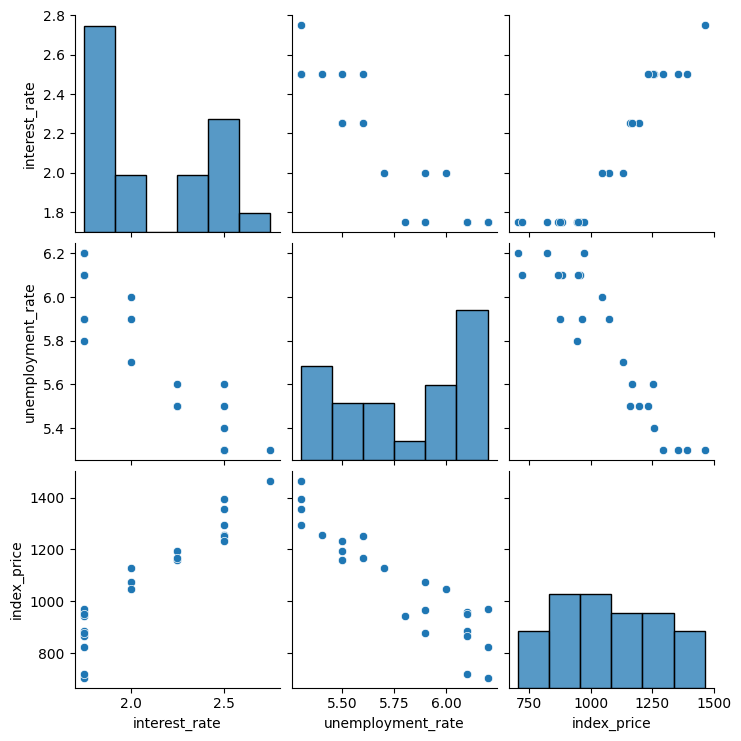

In [69]:
import seaborn as sns

sns.pairplot(df_index)

In [70]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


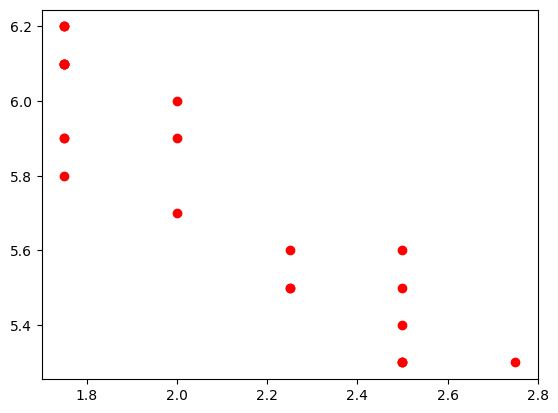

In [71]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'], color='r')

In [72]:
# independant and dependant featurees
x=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]


In [73]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [74]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [75]:
# train test split
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [77]:
import seaborn as sns

Text(0.5, 1.0, 'Interest Rate vs Unemployment Rate with Regression Line')

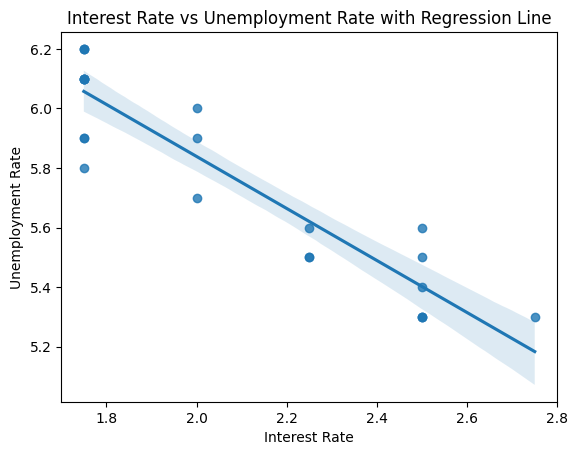

In [78]:
# pass x and y as keyword arguments and provide the DataFrame to avoid positional-argument error
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.title('Interest Rate vs Unemployment Rate with Regression Line')

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [81]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [82]:
from sklearn.model_selection import cross_val_score

validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error', cv=3)

In [83]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [84]:
# prediction

y_pred=regression.predict(x_test)

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [86]:
mse=mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [87]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print(score) 

0.8278978091457145


In [88]:
# ADJUSTED R SQUAREDD
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7131630152428576

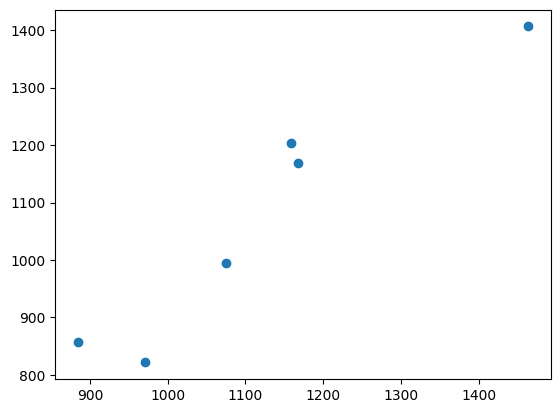

In [89]:
# Assumptions
plt.scatter(y_test,y_pred)

In [90]:
residuals=y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


In [ ]:
# plot this residuals

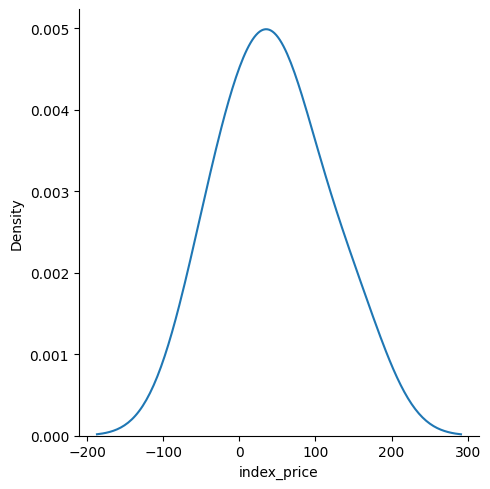

In [91]:
sns.displot(residuals, kind='kde')

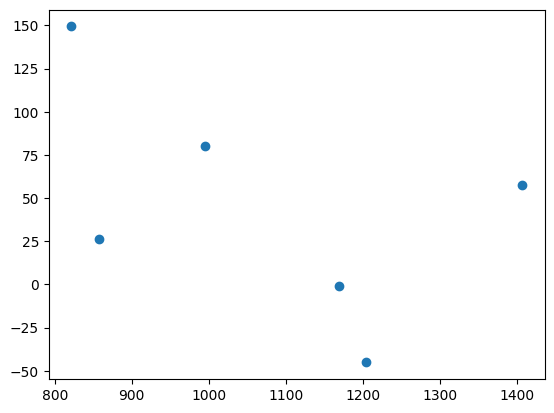

In [92]:
# scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [93]:
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()
prediction=model.predict(x_test)

In [94]:
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [96]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 12 Nov 2025   Prob (F-statistic):                       0.754
Time:                        11:28:24   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [98]:
print(regression.coef_)
print(regression.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443
